# **Análise dos Dados de Partidas de Futebol**

## Objetivo 

Os dados de partidas de futebol oferecem um grande potencial para compreender o desempenho dos times e os fatores que influenciam o resultado dos jogos. O objetivo deste projeto é analisar esses dados de forma exploratória, tratando valores ausentes de maneira cuidadosa para preservar suas características originais a fim de desenvolver um modelo preditivo.

## Obtenção dos dados

In [719]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

pd.options.display.max_columns = 200

In [720]:

# Lendo o arquivo 
df = pd.read_csv('Data/campeonatos_futebol_atualizacao.csv')

## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

- **Chutes a gol 1 / 2**: Número de finalizações que foram enquadradas (ao menos foram na direção do gol) pelo time 1 / time 2.
- **Impedimentos 1 / 2**: Quantas vezes cada time foi pego em posição de impedimento.
- **Escanteios 1 / 2**: Total de cobranças de escanteio a favor de cada equipe.
- **Chutes fora 1 / 2**: Finalizações que não foram na direção do gol (para fora) de cada time.
- **Faltas 1 / 2**: Quantas faltas cada time cometeu durante a partida.
- **Cartões amarelos 1 / 2**: Quantos cartões amarelos foram mostrados a jogadores de cada time.
- **Cartões vermelhos 1 / 2**: Quantos cartões vermelhos foram mostrados a jogadores de cada time.
- **Cruzamentos 1 / 2**: Número de passes laterais elevados (cruzamentos) realizados por cada equipe.
- **Laterais 1 / 2**: Quantas vezes cada time executou arremessos laterais.
- **Chutes bloqueados 1 / 2**: Finalizações de cada time que foram bloqueadas por defensores adversários.
- **Contra-ataques 1 / 2**: Quantas ações de contra-ataque (recuperação e transição rápida) cada equipe conduziu.
- **Gols 1 / 2**: Número de gols marcados por cada time.
- **Tiro de meta 1 / 2**: Quantos arremessos de meta (goal kicks) cada time cobrou.
- **Tratamentos 1 / 2**: Quantas vezes jogadores de cada time receberam atendimento médico em campo.
- **Substituições 1 / 2**: Número de trocas de jogadores realizadas por cada equipe.
- **Tiros-livres 1 / 2**: Quantas cobranças de falta (tiros livres) cada time teve.
- **Defesas difíceis 1 / 2**: Número de defesas de alta dificuldade feitas pelos goleiros de cada time.
- **Posse 1 / 2 (%)**: Percentual de tempo de posse de bola de cada equipe ao longo da partida.
- **Time 1 / 2**: Nome do time da casa (1) e do time visitante (2).
- **Position 1 / 2**: Posição tática inicial ou formação de cada equipe (por exemplo: 4-4-2, 3-5-2 etc.).

Vamos dar uma olhada nas primeiras linhas do Dataframe.


In [721]:
#Primeiras 5 linhas 
df.head()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiro de meta 1,Tiro de meta 2,Tratamentos 1,Tratamentos 2,Substituições 1,Substituições 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


### Quantas linhas e colunas o conjunto de dados possui? Quais os tipos das variáveis? 

In [722]:
# Tamanho do DataFrame
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}\n')

# Tipos de dados de cada coluna
print("Tipos de dados por coluna:\n")
print(df.dtypes)

Número de linhas: 27716
Número de colunas: 40

Tipos de dados por coluna:

Chutes a gol 1         float64
Chutes a gol 2         float64
Impedimentos 1         float64
Impedimentos 2         float64
Escanteios 1           float64
Escanteios 2           float64
Chutes fora 1          float64
Chutes fora 2          float64
Faltas 1               float64
Faltas 2               float64
Cartões amarelos 1     float64
Cartões amarelos 2     float64
Cartões vermelhos 1    float64
Cartões vermelhos 2    float64
Cruzamentos 1          float64
Cruzamentos 2          float64
Laterais 1             float64
Laterais 2             float64
Chutes bloqueados 1    float64
Chutes bloqueados 2    float64
Contra-ataques 1       float64
Contra-ataques 2       float64
Gols 1                 float64
Gols 2                 float64
Tiro de meta 1         float64
Tiro de meta 2         float64
Tratamentos 1          float64
Tratamentos 2          float64
Substituições 1        float64
Substituições 2        flo

## Limpeza e transformação dos dados

Precisamos garantir que os dados que estamos analisando sejam precisos, caso contrário, os resultados de nossa análise estarão errados.

Fizemos uma cópia do DataFrame original para preservar os dados intactos durante a análise exploratória e o desenvolvimento do modelo preditivo. Isso nos permite realizar transformações e comparações com os dados originais, garantindo que qualquer alteração possa ser revertida, além de avaliar o impacto das mudanças nas performances do modelo.

In [723]:
df_copy = df.copy()

A simetria da distribuição será inicialmente avaliada com o objetivo de compreender o comportamento dos dados antes de qualquer etapa de limpeza ou transformação. Essa análise preliminar permite identificar possíveis distorções, como a presença de outliers ou distribuições assimétricas, além de fornecer uma base para comparação com os resultados obtidos após o pré-processamento.

A avaliação da simetria será feita por meio da métrica chamada skewness (ou coeficiente de assimetria), que indica o grau de inclinação da curva de distribuição. Quando o valor de skewness é próximo de zero, a distribuição é considerada simétrica. Valores positivos indicam uma cauda longa à direita (assimetria positiva) e valores negativos, uma cauda longa à esquerda (assimetria negativa). Em geral, considera-se que distribuições com skewness entre -0.5 e 0.5 são aproximadamente simétricas.

In [724]:
# Selecionando apenas colunas numéricas
colunas_numericas = df.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)


                     Assimetria (skewness) Distribuição
Chutes fora 2                    99.858429  Assimétrica
Cartões vermelhos 1               4.632811  Assimétrica
Cartões vermelhos 2               4.430716  Assimétrica
Faltas 2                          2.820571  Assimétrica
Contra-ataques 2                  2.147097  Assimétrica
Contra-ataques 1                  2.023837  Assimétrica
Chutes a gol 2                    1.968407  Assimétrica
Chutes a gol 1                    1.812375  Assimétrica
Tratamentos 1                     1.501920  Assimétrica
Tratamentos 2                     1.372405  Assimétrica
Impedimentos 2                    1.198815  Assimétrica
Impedimentos 1                    1.181808  Assimétrica
Chutes bloqueados 1               1.129360  Assimétrica
Chutes bloqueados 2               1.122076  Assimétrica
Gols 2                            1.104355  Assimétrica
Gols 1                            0.960099  Assimétrica
Cruzamentos 2                     0.906040  Assi

A análise da assimetria (skewness) mostrou que várias variáveis numéricas do conjunto de dados apresentam distribuições assimétricas. Esse comportamento pode comprometer a consistência da análise estatística e a performance de modelos que assumem distribuições mais equilibradas. Por isso, nas próximas etapas, será realizado o tratamento de valores duplicados e outliers com o objetivo de reduzir essas distorções e aproximar as distribuições de uma forma mais simétrica e adequada à análise.

### Tratando linhas duplicadas

Verificando se há registros duplicados no Dataframe, pois não nos interessar analisar a mesma partida mais de uma vez. 

In [725]:

# Verificando se há linhas duplicadas no dataframe
if df.duplicated().any():
    # Contando o número total de linhas duplicadas
    quantidade_duplicadas = df_copy.duplicated().sum()
    print(f'Sim, existem {quantidade_duplicadas} linhas duplicadas.')
else:
    print('Não, não existem linhas duplicadas.')


Sim, existem 12 linhas duplicadas.


Identificamos a presença de registros duplicados no dataframe. Na ausência de uma coluna com a data das partidas, adotamos o critério de considerar duplicatas exatas como representações da mesma partida. 

Assim, como cada linha representa uma partida de futebol, essas duplicatas indicam possíveis inconsistências, como erros de entrada ou falhas na coleta de dados.

A remoção dessas entradas garante que cada partida seja considerada apenas uma vez, preservando a integridade do conjunto de dados e evitando distorções nas análises estatísticas.

In [726]:
# Retorna um novo Dataframe com apenas as linhas não duplicadas 
df_copy = df_copy.loc[~df_copy.duplicated()].drop_duplicates().reset_index(drop=True)

# Verificando novamente se há linhas duplicadas no dataframe
if df_copy.duplicated().any():
    # Contando o número total de linhas duplicadas
    quantidade_duplicadas = df_copy.duplicated().sum()
    print(f'Sim, existem {quantidade_duplicadas} linhas duplicadas.')
else:
    print('Não, não existem linhas duplicadas.')

Não, não existem linhas duplicadas.


### Qual a porcentagem de valores ausentes no dataset?

Vamos analisar a porcentagem de Not a Number em cada coluna.

In [727]:
# Porcentagem de NaN
def pegaPorcentagemNulaTabelas(tabela):
  return (tabela.isnull().sum()/len(tabela)*100).sort_values(ascending=False)

tabelaPorcentagem = pegaPorcentagemNulaTabelas(df)

print(tabelaPorcentagem)

print(df_copy.dtypes)

Tratamentos 2          81.891326
Tratamentos 1          81.891326
Defesas difíceis 2     77.644682
Defesas difíceis 1     77.644682
Tiros-livres 1         77.464281
Tiros-livres 2         77.464281
Contra-ataques 2       77.402944
Contra-ataques 1       77.402944
Chutes bloqueados 1    68.094242
Chutes bloqueados 2    68.094242
Cruzamentos 1          67.473661
Cruzamentos 2          67.473661
Substituições 1        66.012412
Substituições 2        66.012412
Tiro de meta 1         56.649589
Tiro de meta 2         56.649589
Laterais 1             45.277096
Laterais 2             45.277096
Impedimentos 1         10.008659
Impedimentos 2         10.008659
Posse 1(%)              8.478857
Posse 2(%)              8.478857
Escanteios 1            8.399480
Escanteios 2            8.399480
Chutes fora 2           8.385048
Chutes fora 1           8.385048
Faltas 1                8.377832
Faltas 2                8.377832
Position 2              5.881080
Position 1              5.780055
Chutes a g

Considerando nosso senso comum acerca de futebol, juntamente à muita quantidade atrelada ao alto números de NaN as colunas eliminas serão: Tratamentos 1 e 2, Substituições 1 e 2 e Tiro de meta 1 e 2 e Laterais 1, Laterais 2 

In [728]:
# Lista das colunas a serem eliminadas
colunas_para_deletar = [
    'Tratamentos 1', 'Tratamentos 2',
    'Substituições 1', 'Substituições 2',
    'Tiro de meta 1', 'Tiro de meta 2'
]
# Filtrando para manter apenas as colunas que existem no DataFrame
colunas_existentes = [col for col in colunas_para_deletar if col in df_copy.columns]

# Deletando as colunas que existem
df_copy.drop(columns=colunas_existentes, inplace=True)

print(f'Número de colunas: {df_copy.shape[1]}\n')


Número de colunas: 34



In [729]:
# Lista de colunas que não devem ser alteradas
colunas_excecao = ['Time 1', 'Time 2', 'Position 1', 'Position 2']

# Cria uma nova lista com todas as colunas numéricas do df
# Verifica se as colunas em col são numéricas com pd.api.types.is_numeric_dtypes(df[col])
# Retorna True se a coluna col for numérica e False se não for numérica
colunas_para_imputar = [col for col in df_copy.columns if col not in colunas_excecao and pd.api.types.is_numeric_dtype(df_copy[col])]

# Imputa os NaNs pela mediana de cada coluna

def preecheTabelaComMediana():
    for col in colunas_para_imputar:
        mediana = df_copy[col].median()           # Calcula a mediana da coluna 
        df[col] = df_copy[col].fillna(mediana)    # Susbtitui os valores NaN pela mediana 


def preecheTabelaComMedianaPorcentagem(porcentagem):

  for coluna in df_copy:
    if(tabelaPorcentagem[coluna] < porcentagem and df_copy.dtypes[coluna] == 'float64'):

      col_median=df_copy[coluna].median()

      df_copy[coluna]=df[coluna].fillna(col_median)

  return df 

# Preenchemos apenas a posição com moda pelo fato de sua coluna ser tipada como um string
def preencheTabelaComModa():
    modaP1, modaP2 = df_copy['Position 1'].mode()[0],df_copy['Position 2'].mode()[0]
    df_copy['Position 1']=df_copy['Position 1'].fillna(modaP1)
    df_copy['Position 2']=df_copy['Position 2'].fillna(modaP2)
    return df_copy

preecheTabelaComMediana()
preencheTabelaComModa()

# Verifica se ainda existem NaNs

print(df_copy.isnull().sum())


Chutes a gol 1          1512
Chutes a gol 2          1512
Impedimentos 1          2772
Impedimentos 2          2772
Escanteios 1            2327
Escanteios 2            2327
Chutes fora 1           2323
Chutes fora 2           2323
Faltas 1                2321
Faltas 2                2321
Cartões amarelos 1         0
Cartões amarelos 2         0
Cartões vermelhos 1        0
Cartões vermelhos 2        0
Cruzamentos 1          18689
Cruzamentos 2          18689
Laterais 1             12547
Laterais 2             12547
Chutes bloqueados 1    18861
Chutes bloqueados 2    18861
Contra-ataques 1       21441
Contra-ataques 2       21441
Gols 1                     0
Gols 2                     0
Tiros-livres 1         21468
Tiros-livres 2         21468
Defesas difíceis 1     21518
Defesas difíceis 2     21518
Posse 1(%)              2349
Posse 2(%)              2349
Time 1                     0
Time 2                     0
Position 1                 0
Position 2                 0
dtype: int64


In [730]:
# ESTUDANDO A SIMETRIA PARA VER QUAL O MELHOR VALOR DE % NO OUTLIER (PAGAR DEPOIS)

# Selecionando apenas colunas numéricas
colunas_numericas = df_copy.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)

                     Assimetria (skewness) Distribuição
Chutes fora 2                    99.853113  Assimétrica
Cartões vermelhos 1               4.633895  Assimétrica
Cartões vermelhos 2               4.429616  Assimétrica
Faltas 2                          2.821611  Assimétrica
Contra-ataques 2                  2.147097  Assimétrica
Contra-ataques 1                  2.023837  Assimétrica
Chutes a gol 2                    1.968073  Assimétrica
Chutes a gol 1                    1.812748  Assimétrica
Impedimentos 2                    1.198577  Assimétrica
Impedimentos 1                    1.181931  Assimétrica
Chutes bloqueados 1               1.129360  Assimétrica
Chutes bloqueados 2               1.122076  Assimétrica
Gols 2                            1.104387  Assimétrica
Gols 1                            0.960333  Assimétrica
Cruzamentos 2                     0.906040  Assimétrica
Defesas difíceis 2                0.871974  Assimétrica
Defesas difíceis 1                0.850749  Assi

### Tratando Outliers

Descrever a importancia de tracar outliers aqui, como foi feito e justificar a escolha do método. 

In [731]:
# Definindo o threshold para o IQR
threshold = 1.5

# Selecionando apenas colunas numéricas
numeric_cols = df_copy.select_dtypes(include='number').columns

# Criando um dicionário para armazenar os resultados
outliers_por_coluna = {}

for col in numeric_cols:
    Q1 = df_copy[col].quantile(0.30)
    Q3 = df_copy[col].quantile(0.70)
    IQR = Q3 - Q1
    outliers = df_copy[(df_copy[col] < Q1 - threshold * IQR) | (df_copy[col] > Q3 + threshold * IQR)]
    outliers_por_coluna[col] = len(outliers)

# Criando uma tabela
tabela_outliers = pd.DataFrame.from_dict(outliers_por_coluna, orient='index', columns=['Quantidade de Outliers'])
tabela_outliers = tabela_outliers.sort_values(by='Quantidade de Outliers', ascending=False)

print(tabela_outliers)


                     Quantidade de Outliers
Cartões amarelos 1                     3284
Gols 1                                 2126
Posse 2(%)                             1573
Posse 1(%)                             1573
Chutes fora 1                          1555
Cartões vermelhos 2                    1545
Defesas difíceis 1                     1466
Chutes bloqueados 2                    1392
Cartões vermelhos 1                    1325
Chutes fora 2                          1063
Escanteios 1                            957
Chutes a gol 1                          886
Contra-ataques 2                        848
Faltas 2                                728
Faltas 1                                615
Escanteios 2                            606
Chutes a gol 2                          586
Impedimentos 1                          552
Impedimentos 2                          429
Cruzamentos 2                           424
Cruzamentos 1                           376
Tiros-livres 1                  

In [732]:
# Remover os outliers das colunas numéricas
for col in numeric_cols:
    Q1 = df_copy[col].quantile(0.30)
    Q3 = df_copy[col].quantile(0.70)
    IQR = Q3 - Q1
    
    # Identificando os outliers
    outliers = df_copy[(df_copy[col] < Q1 - threshold * IQR) | (df_copy[col] > Q3 + threshold * IQR)]
    
    # Excluindo os outliers
    df_copy = df_copy.drop(outliers.index)


In [733]:
# ESTUDANDO A SIMETRIA PARA VER QUAL O MELHOR VALOR DE % NO OUTLIER (PAGAR DEPOIS)

# Selecionando apenas colunas numéricas
colunas_numericas = df_copy.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)

                     Assimetria (skewness) Distribuição
Contra-ataques 1                  1.181056  Assimétrica
Gols 2                            0.908689  Assimétrica
Impedimentos 2                    0.739260  Assimétrica
Impedimentos 1                    0.650853  Assimétrica
Chutes bloqueados 1               0.585049  Assimétrica
Contra-ataques 2                  0.520449  Assimétrica
Cartões amarelos 2                0.475099    Simétrica
Chutes a gol 2                    0.439369    Simétrica
Defesas difíceis 2                0.357381    Simétrica
Escanteios 2                      0.345938    Simétrica
Chutes a gol 1                    0.336939    Simétrica
Chutes fora 2                     0.300169    Simétrica
Gols 1                            0.248357    Simétrica
Escanteios 1                      0.237633    Simétrica
Cruzamentos 1                     0.215938    Simétrica
Cruzamentos 2                     0.210135    Simétrica
Defesas difíceis 1                0.203820    Si

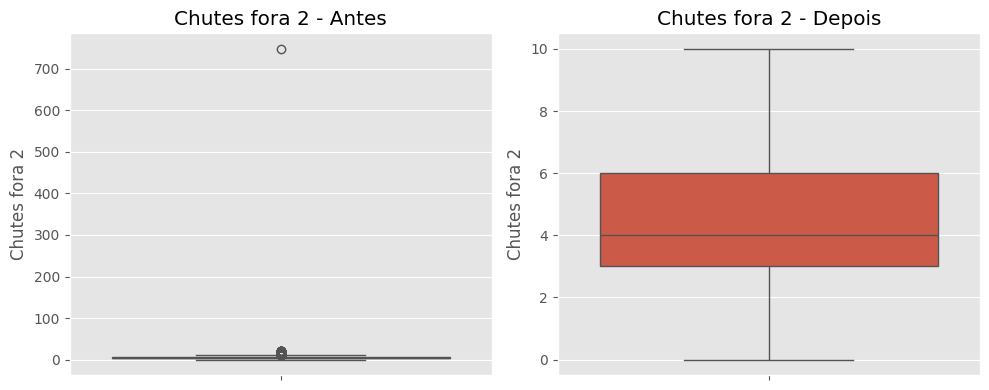

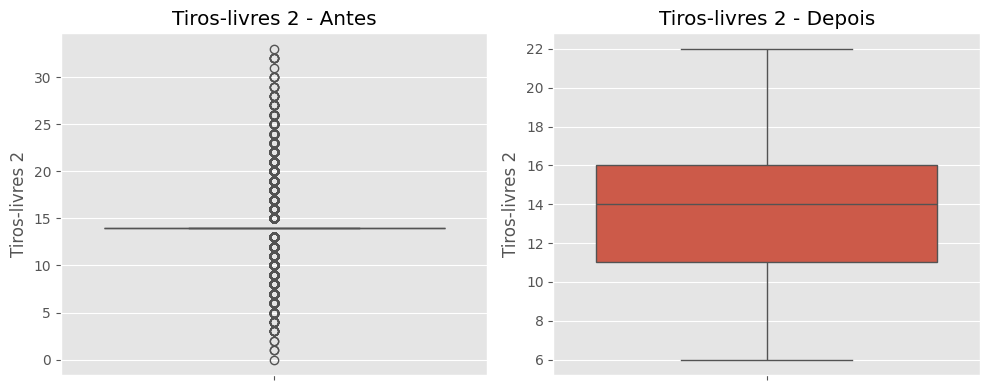

In [734]:
# Lista de colunas que você quer comparar
colunas_para_visualizar = ['Chutes fora 2', 'Tiros-livres 2']

# Cria os subplots
for col in colunas_para_visualizar:
    plt.figure(figsize=(10, 4))

    # Antes
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} - Antes')

    # Depois
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_copy[col])
    plt.title(f'{col} - Depois')

    plt.tight_layout()
    plt.show()


### Mudando o tipo de variável das colunas

Vamos codificar as colunas Position 1, Position 2, Time 1 e Time 2.

In [735]:
# Colunas não numéricas: Time e Position

times = np.union1d(df['Time 1'].dropna().unique(), df_copy['Time 2'].dropna().unique())
times_codigo = {times[i]: (i+1) for i in range(len(times))}
print("Total de Times = {}".format(len(times)))

posicoes = np.union1d(df['Position 1'].dropna().unique(), df['Position 2'].dropna().unique())
posicoes_codigo = {posicoes[i]: (i+1) for i in range(len(posicoes))}
print("Total de Formações = {}".format(len(posicoes)))

def insere_coluna_codificada(df, coluna, nome_coluna_codigo, dicionario_codificacao):
    if(nome_coluna_codigo not in df_copy.columns):
        df_copy.insert(df_copy.columns.get_loc( coluna )+1, nome_coluna_codigo, df_copy[ coluna ].map( dicionario_codificacao ))

# Cria o dataframe com as colunas não numéricas codificadas em novas
df_codificado = df_copy.copy()

insere_coluna_codificada(df_codificado, 'Position 1', 'Pos1_codigo', posicoes_codigo)
insere_coluna_codificada(df_codificado, 'Position 2', 'Pos2_codigo', posicoes_codigo)
insere_coluna_codificada(df_codificado, 'Time 1', 'Time1_codigo', times_codigo)
insere_coluna_codificada(df_codificado, 'Time 2', 'Time2_codigo', times_codigo)

df_codificado.head()

Total de Times = 310
Total de Formações = 30


,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1
10,4.0,5.0,4.0,1.0,8.0,6.0,5.0,5.0,12.0,10.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,52.0,48.0,St.Johnstone,Motherwell,3-4-2-1,4-2-3-1
11,6.0,0.0,2.0,2.0,11.0,4.0,7.0,7.0,7.0,11.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,59.0,41.0,Hibernian,Ross County,4-2-3-1,5-4-1
12,3.0,6.0,0.0,1.0,4.0,8.0,7.0,3.0,14.0,13.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,63.0,37.0,Livingston,Motherwell,4-3-3,4-3-3
15,2.0,5.0,0.0,4.0,7.0,4.0,6.0,1.0,12.0,20.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,51.0,49.0,St.Johnstone,Dundee U.,3-5-2,4-4-2


 ### Análise de Correlações

 Assim sendo, para entendermos melhor a correlação entre Chutes a Gols e Gols, montamos um pairplot para verificarmos como a quantidade de gols varia em função do número de gols e vice-versa, o que nos resultou no resultado a seguir:


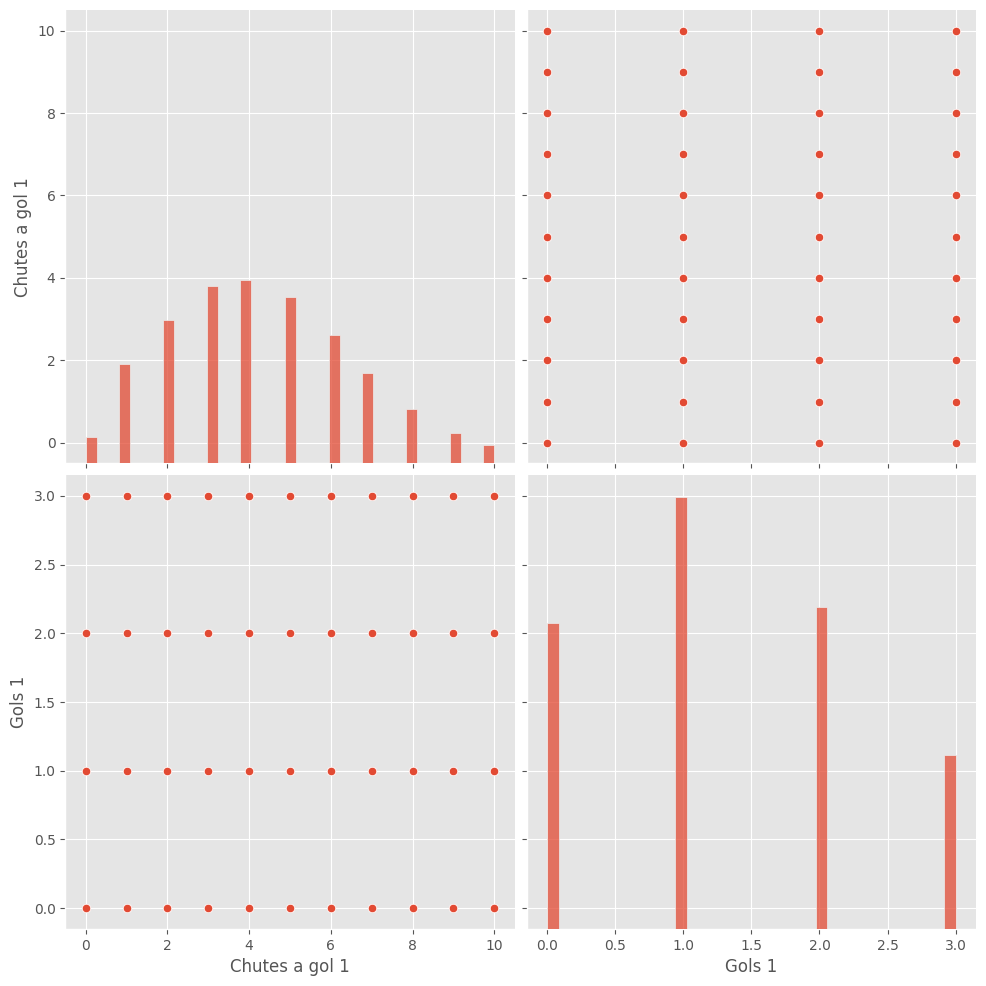

In [736]:
sns.pairplot(df_codificado, vars=['Chutes a gol 1', 'Gols 1'], height=5)
plt.show()

Conforme podemos ver, não está muito claro, nos gráficos, se tais dados possuem uma alta correlação. Os dataTypes das colunas Chute a Gols 1 e Gols 1 são floats, porém, o conjunto que representa a possibilidade de valores dessas colunas pode facilmente ser identificado como um conjunto discreto, já que é impossível termos 3.5956754 gols em um partida, ou 5.67532 chute a gol em outra. Sendo assim, a quantidade de vezes que um par de dados (Chutes a Gol 1, Gols 1) aparece, no nosso dataset, é muito importante para que ocorra a plotação de um possível gráfico, pois podem haver vários casos em que acontecem, por exemplo, 10 chutes a gol e 5 gols em certas partidas. Consequentemente, um gráfico em 2d (Chutes a gol 1, Gols 1) não é suficiente para tirarmos conclusões na nossa análise, temos utilizar que outro eixo (frequência).

O código abaixo reúne, em um novo dataFrame, tais informações que necessitamos atualmente.

In [737]:
result = df.groupby(['Chutes a gol 1', 'Gols 1']).size().reset_index(name='Frequência').sort_values('Frequência', ascending=False).head(50)
print(result)

    Chutes a gol 1  Gols 1  Frequência
24             4.0     1.0        1978
18             3.0     1.0        1491
25             4.0     2.0        1374
23             4.0     0.0        1358
32             5.0     1.0        1270
17             3.0     0.0        1122
11             2.0     0.0        1101
7              1.0     1.0        1089
33             5.0     2.0        1067
12             2.0     1.0        1063
40             6.0     2.0         913
39             6.0     1.0         844
6              1.0     0.0         832
19             3.0     2.0         780
13             2.0     2.0         717
31             5.0     0.0         647
48             7.0     2.0         635
47             7.0     1.0         574
34             5.0     3.0         546
41             6.0     3.0         519
26             4.0     3.0         517
49             7.0     3.0         457
55             8.0     2.0         446
0              0.0     0.0         438
38             6.0     0.

Dessa forma, montamos um gráfico para visualizarmos tais informações de forma mais intuitiva

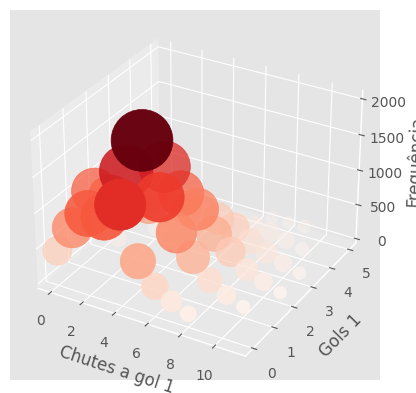

In [738]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = result['Chutes a gol 1']
y = result['Gols 1']
z = result['Frequência']

ax.set_xlabel('Chutes a gol 1')
ax.set_ylabel('Gols 1')
ax.set_zlabel('Frequência')

ax.scatter(x,y, z, s=z, c=z, cmap='Reds')

plt.show()

Nesse gráfico, é importante perceber que, quanto maior a frequência, mais escura é a esfera.

A partir dele, podemos entender que, analisando as esferas mais escuras (casos que ocorrem mais no nosso dataset), um aumento no número de chutes a gol está muito correlacionado com uma maior quantidade de gols.

Podemos perceber, também, que os casos com o maior número de gols (são poucos casos, representados por esferas mais claras) estão muito relacionados com uma alta quantidade de chutes a gol de uma partida. 


#### Análise Geral

Nesse sentido, decidimos realizar uma análise geral de todas as correlações do nosso dataFrame. 

Podemos perceber que, de fato, Chutes a gol tem uma alta correlação com Gols no heatmap produzido pelo código a seguir:

Gols 1                 1.000000
Chutes a gol 1         0.379496
Contra-ataques 1       0.163210
Defesas difíceis 2     0.047996
Cartões amarelos 2     0.046315
Posse 1(%)             0.044472
Cruzamentos 2          0.041389
Impedimentos 1         0.029176
Escanteios 2           0.014342
Chutes bloqueados 1   -0.002110
Chutes fora 2         -0.003695
Faltas 1              -0.008535
Impedimentos 2        -0.011354
Tiros-livres 2        -0.014202
Faltas 2              -0.015281
Escanteios 1          -0.016309
Chutes fora 1         -0.024148
Laterais 2            -0.025216
Tiros-livres 1        -0.029515
Cartões amarelos 1    -0.036653
Gols 2                -0.037510
Chutes bloqueados 2   -0.037974
Posse 2(%)            -0.044475
Defesas difíceis 1    -0.049713
Chutes a gol 2        -0.057784
Cruzamentos 1         -0.109232
Laterais 1            -0.109621
Contra-ataques 2      -0.165367
Cartões vermelhos 1         NaN
Cartões vermelhos 2         NaN
Name: Gols 1, dtype: float64

Gols 2    

<Axes: >

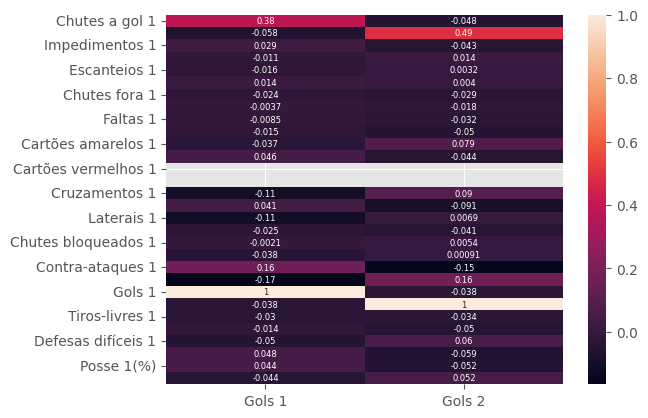

In [739]:
correlacoes = df_codificado.drop(['Time 1', 'Time 2', 'Position 1', 'Position 2'], axis=1).corr()
#sns.heatmap(correlacoes)

correlacoes_com_Gols = pd.DataFrame({
    "Gols 1": correlacoes['Gols 1'], 
    "Gols 2": correlacoes['Gols 2'], 
})


print(correlacoes_com_Gols['Gols 1'].sort_values(ascending=False))
print()
print(correlacoes_com_Gols['Gols 2'].sort_values(ascending=False))

sns.heatmap(correlacoes_com_Gols, annot=True, annot_kws={"size":6})